In [ ]:
import pandas as pd

# Load the reviews dataset
reviews_file_path = "/content/cleaned_pure_gym_reviews.csv"
df_reviews = pd.read_csv(reviews_file_path)

# Drop rows with missing data in the necessary column (cleaned_review)
df_reviews.dropna(subset=['cleaned_review'], inplace=True)

# Randomly sample 2000 reviews
sample_size = 2000
if len(df_reviews) >= sample_size:
    df_reviews_sampled = df_reviews.sample(n=sample_size, random_state=42).reset_index(drop=True)
else:
    df_reviews_sampled = df_reviews.copy()
    print(f"Dataset has fewer than {sample_size} rows. Using all available rows: {len(df_reviews_sampled)}.")

# Select necessary columns for analysis
columns_needed = ['Rating', 'Sentiment', 'cleaned_review']
df_analysis = df_reviews_sampled[columns_needed]

# Save the sampled dataset to a new CSV file to avoid overwriting original
output_csv_path = "/content/cleaned_pure_gym_reviews.csv"
df_analysis.to_csv(output_csv_path, index=False)

print(f"Sampled and filtered reviews saved to {output_csv_path}")

Dataset has fewer than 2000 rows. Using all available rows: 1672.
Sampled and filtered reviews saved to /content/sampled_pure_gym_reviews_analysis.csv


In [ ]:
!pip install nltk
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the 'stopwords' resource
nltk.download('stopwords')
# Download the 'punkt_tab' resource: This line is added to fix the LookupError
nltk.download('punkt_tab')

# ==============================
# Tokenization
# ==============================
nltk_stopwords = set(stopwords.words('english'))
custom_stopwords = {"company", "business", "year", "report", "customer", "service",
                    "employees", "products", "services", "organization", "work",
                    "gym", "puregym"}  # Added "gym" and "puregym"
final_stopwords = nltk_stopwords.union(custom_stopwords)

def tokenize_text(text):
    words = word_tokenize(str(text))
    return [word for word in words if word.isalnum() and word.lower() not in final_stopwords]

# Applying tokenization to the 'cleaned_review' column of df_reviews
df_reviews['tokens'] = df_reviews['cleaned_review'].apply(tokenize_text)

review_tokens_csv = "/content/cleaned_pure_gym_reviews.csv"
df_reviews.to_csv(review_tokens_csv, index=False)

print(f"Tokenized reviews saved to {review_tokens_csv}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokenized reviews saved to /content/cleaned_pure_gym_reviews_with_tokens.csv


In [ ]:
!pip uninstall numpy gensim -y
!pip install numpy gensim --upgrade
!pip install bertopic
# LDA and BERTopic on Pure Gym Reviews

# Import necessary libraries explicitly
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
import gensim
from bertopic import BERTopic

nltk.download('punkt')
nltk.download('stopwords')

# Load your dataset explicitly
df = pd.read_csv('/content/cleaned_pure_gym_reviews.csv', encoding="ISO-8859-1")
df = df[df['cleaned_review'].notna()]

# Preprocess clearly for LDA
stop_words = set(stopwords.words('english'))
custom_stopwords = {'gym', 'pure', 'puregym', 'equipment', 'staff'}
final_stopwords = stop_words.union(custom_stopwords)

def preprocess_tokens(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in final_stopwords]
    return tokens

df['tokens'] = df['cleaned_review'].apply(preprocess_tokens)


# Train LDA Model explicitly

dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=15,
    iterations=500,
    alpha='auto',
    eta='auto',
    minimum_probability=0.01
)

# Output LDA topics clearly
print("\n=== LDA Topics (Pure Gym Reviews) ===")
for topic_id, words in lda_model.show_topics(num_topics=5, num_words=10, formatted=False):
    keywords = [word for word, _ in words]
    print(f"Topic {topic_id + 1}: {keywords}")


# Train BERTopic explicitly

# Note: BERTopic requires raw text, not tokenized lists
bertopic_model = BERTopic()
topics, probs = bertopic_model.fit_transform(df['cleaned_review'])

# Output BERTopic topics clearly
print("\n=== BERTopic (Pure Gym Reviews) ===")
for topic_id in bertopic_model.get_topic_info().head(11)['Topic']:
    if topic_id == -1:
        continue  # -1 indicates outliers in BERTopic
    words = bertopic_model.get_topic(topic_id)
    keywords = [word for word, _ in words[:10]]
    print(f"Topic {topic_id}: {keywords}")


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



=== LDA Topics (Pure Gym Reviews) ===
Topic 1: ['easy', 'process', 'joining', 'sign', 'pass', 'day', 'simple', 'atmosphere', 'clear', 'friendly']
Topic 2: ['friendly', 'good', 'helpful', 'use', 'member', 'membership', 'ive', 'small', 'joining', 'space']
Topic 3: ['easy', 'great', 'good', 'join', 'quick', 'experience', 'really', 'excellent', 'clean', 'simple']
Topic 4: ['value', 'time', 'first', 'money', 'didnt', 'nice', 'great', 'love', 'fantastic', 'work']
Topic 5: ['good', 'amazing', 'need', 'new', 'well', 'everything', 'today', 'like', 'rejoining', 'class']

=== BERTopic (Pure Gym Reviews) ===
Topic 0: ['pure', 'gym', 'been', 'the', 'have', 'joined', 'my', 'at', 'me', 'to']
Topic 1: ['ok', 'it', 'good', 'awesome', 'was', 'far', 'amazing', 'but', 'its', 'okay']
Topic 2: ['staff', 'friendly', 'helpful', 'welcoming', 'very', 'manager', 'made', 'and', 'team', 'the']
Topic 3: ['joining', 'membership', 'fee', 'member', 'joined', 'as', 'join', 'experience', 'was', 'memberships']
Topic 4: 

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Extract the top 10 keywords from each BERTopic topic
ber_topic_tokens = [[word for word, _ in topic[:10]] for topic in bertopic_model.get_topics().values()]

# Filter out any empty topics
ber_topic_tokens = [topic for topic in ber_topic_tokens if topic]

# Compute coherence score for LDA
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()

# Compute coherence score for BERTopic
coherence_model_bertopic = CoherenceModel(
    topics=ber_topic_tokens, texts=df['tokens'], dictionary=dictionary, coherence='c_v'
)
coherence_bertopic = coherence_model_bertopic.get_coherence()

# Print results clearly
print(f"LDA Coherence Score: {coherence_lda:.3f}")
print(f"BERTopic Coherence Score: {coherence_bertopic:.3f}")


LDA Coherence Score: 0.617
BERTopic Coherence Score: 0.388


In [ ]:
# LDA Topic Diversity (Pure Gym Reviews)

def calculate_lda_topic_diversity(lda_model, top_n_words=10):
    topics = lda_model.show_topics(num_topics=lda_model.num_topics, num_words=top_n_words, formatted=False)
    unique_words = set()
    for topic in topics:
        unique_words.update([word for word, _ in topic[1]])
    return len(unique_words) / (top_n_words * lda_model.num_topics)

lda_topic_diversity = calculate_lda_topic_diversity(lda_model)


# BERTopic Topic Diversity (Pure Gym Reviews)

def calculate_bertopic_topic_diversity(model, top_n_words=10):
    topics = model.get_topics()
    unique_words = set()
    for topic in topics.values():
        unique_words.update([word for word, _ in topic[:top_n_words]])
    return len(unique_words) / (top_n_words * len(topics))

bertopic_topic_diversity = calculate_bertopic_topic_diversity(bertopic_model)

# Print results clearly
print(f"LDA Topic Diversity Score: {lda_topic_diversity:.3f}")
print(f"BERTopic Topic Diversity Score: {bertopic_topic_diversity:.3f}")


LDA Topic Diversity Score: 0.860
BERTopic Topic Diversity Score: 0.731


Num Topics: 2, Coherence Score: 0.5644
Num Topics: 3, Coherence Score: 0.5977
Num Topics: 4, Coherence Score: 0.5922
Num Topics: 5, Coherence Score: 0.6101
Num Topics: 6, Coherence Score: 0.6238
Num Topics: 7, Coherence Score: 0.6190
Num Topics: 8, Coherence Score: 0.6366
Num Topics: 9, Coherence Score: 0.6327
Num Topics: 10, Coherence Score: 0.6416
Num Topics: 11, Coherence Score: 0.6396
Num Topics: 12, Coherence Score: 0.6557
Num Topics: 13, Coherence Score: 0.6198
Num Topics: 14, Coherence Score: 0.6291
Num Topics: 15, Coherence Score: 0.6395
Num Topics: 16, Coherence Score: 0.6386
Num Topics: 17, Coherence Score: 0.6472
Num Topics: 18, Coherence Score: 0.6492
Num Topics: 19, Coherence Score: 0.6511


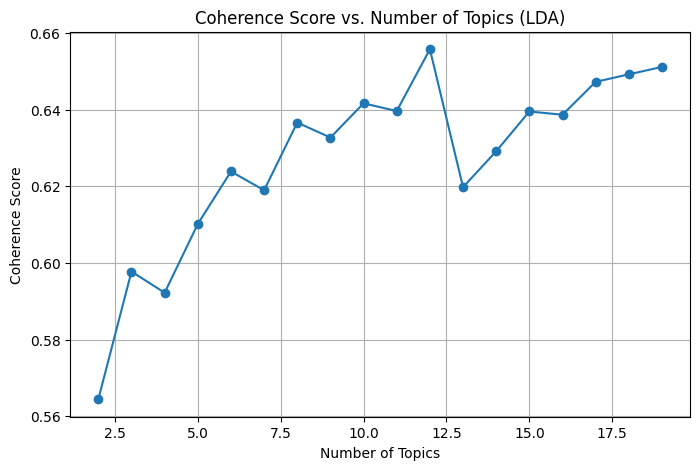


✅ Optimal Number of Topics: 12


In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Use tokenized reviews from your actual DataFrame
tokenized_texts = df['tokens'].tolist()

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Function to compute coherence scores across a range of topics
def compute_coherence_values(dictionary, corpus, texts, topic_range):
    coherence_scores = []
    for num_topics in topic_range:
        lda_model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=10,
            iterations=200
        )
        coherence_model = CoherenceModel(
            model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v'
        )
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)
        print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

    return coherence_scores

# Define range of topics to evaluate
topic_range = range(2, 20)

# Run the coherence evaluation
coherence_scores = compute_coherence_values(dictionary, corpus, tokenized_texts, topic_range)

# Plot the coherence scores
plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics (LDA)")
plt.grid()
plt.show()

# Identify optimal number of topics
optimal_topic_num = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"\n Optimal Number of Topics: {optimal_topic_num}")


In [ ]:
!Pip install pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Training LDA
num_topics = 16
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    iterations=200
)

# Visualize with topic sorting OFF
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

vis



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.047452 -0.020981       1        1   5.038547
1      0.047984 -0.032097       2        1   3.961046
2      0.106222  0.249658       3        1   8.545352
3      0.047013 -0.083995       4        1   3.482038
4      0.056918 -0.020944       5        1   4.370131
5      0.080043 -0.054067       6        1   4.594489
6      0.023802 -0.112605       7        1   6.386708
7      0.071531 -0.070137       8        1   6.829047
8     -0.184395 -0.007221       9        1   6.362403
9      0.009895 -0.143818      10        1   6.042867
10     0.139889  0.139945      11        1   7.484918
11     0.027842 -0.091825      12        1   5.333616
12    -0.288994  0.109829      13        1  11.310449
13     0.107490  0.109015      14        1   6.015054
14    -0.259052  0.012157      15        1   8.427006
15    -0.033639  0.017086      16        1   5.816333, topic_info=             Term        Freq       Total Category  logprob  loglift
23           easy  273.000000  273.000000  Default  30.0000  30.0000
1            good  138.000000  138.000000  Default  29.0000  29.0000
11          great  126.000000  126.000000  Default  28.0000  28.0000
44           join   92.000000   92.000000  Default  27.0000  27.0000
0      experience   51.000000   51.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
401  disappointed    1.597864    7.079975  Topic16  -5.0962   1.3559
99          happy    1.581638    7.100956  Topic16  -5.1064   1.3427
1            good    3.547427  138.136124  Topic16  -4.2987  -0.8175
238          well    1.759894   13.315287  Topic16  -4.9996   0.8208
143    membership    1.604728   16.582116  Topic16  -5.0919   0.5091

[814 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
434      12  0.628472     ability
675      11  0.640412        able
109       2  0.509765  absolutely
109      16  0.254883  absolutely
173       1  0.091834      access
...     ...       ...         ...
1042      9  0.637161           x
299       8  0.627512       years
299      10  0.156878       years
299      12  0.156878       years
450      12  0.835581         yes

[1084 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])